# Домашнее задание «Деревья решений»
Для выполнения домашнего задания необходимо взять файл boston house-prices datase (sklearn.datasets.load_boston) и построить модель.
По аналогии задания к лекции «Классификация: Логистическая регрессия и SVM».
А именно построить модель регрессии, дерево решений, оптимизировать параметры и сравнить результаты.

In [42]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
data = pd.read_csv(load_boston()['filename'], skiprows=1)
print(load_boston()['DESCR'])
from sklearn import metrics

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [3]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT'
]
X= data[columns]
#X = data.drop('MEDV', axis=1)
y= data['MEDV']


In [9]:
X.shape

(506, 13)

In [10]:
y.shape

(506,)

In [11]:
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)
X_train.shape, y_train.shape

((404, 13), (404,))

# Модель линейной регрессии

In [12]:
# обучаем модель на части датасета (train)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_predLR=model.predict(X_test)

In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predLR))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predLR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predLR)))

Mean Absolute Error: 3.1890919658878842
Mean Squared Error: 24.291119474973815
Root Mean Squared Error: 4.928602182665367


In [15]:
model.score(X_test, y_test)

0.6687594935356279

# Дерево решений 

In [37]:
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

DecisionTreeRegressor()

In [38]:
y_pred = clf.predict(X_test)

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.3637254901960785
Mean Squared Error: 9.927941176470588
Root Mean Squared Error: 3.1508635604339625


In [40]:
clf.score(X_test, y_test)

0.864619814379874

In [45]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

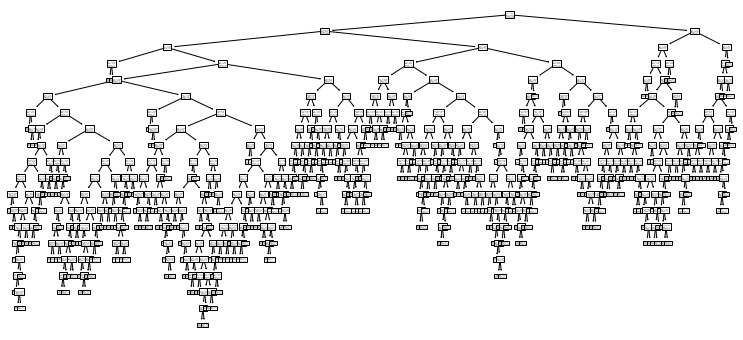

In [46]:
tree.plot_tree(clf);